# Assignment - 11 Text Mining (Ecomm Website)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import warnings
warnings.filterwarnings('ignore')
import requests 
from bs4 import BeautifulSoup as bs
import re
from wordcloud import WordCloud

##### Creating a Empty Review List

In [5]:
iphone_reviews = []

In [6]:
for i in range (1,21):
    ip=[]
    url = "https://www.amazon.in/product-reviews/B08L5T44CQ/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews#reviews-filter-bar="+str(i)
    response = requests.get(url)
    soup = bs(response.content, "html.parser")
    reviews = soup.findAll("span", attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        ip.append(reviews[i].text)
    iphone_reviews = iphone_reviews+ip

##### Writing Reviews in a Text File

In [7]:
with open("iphone.txt","w",encoding = 'utf-8') as output:
    output.write(str(iphone_reviews))

In [8]:
import os
os.getcwd()

'C:\\Users\\SHARAN\\ExcelR Assignment\\11_Text Mining - Pending'

##### Joining all the Reviews into Single Para

In [9]:
red_rev_string = " ".join(iphone_reviews)

In [10]:
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()

In [11]:
red_rev_string = re.sub("[0-9" "]+"," ",red_rev_string)

In [12]:
red_rev_string

' as usual great premium phone of prosthis time the apple iphone uses the right angled bezel of the iphone s which looks square and it feels good in the hand it feels better than the sleek bezel of the iphone x especially the mm thickness with right angles the border is particularly stylish the camera is awesome the night view mode turns on automatically and the imaging effect is really good video stabilization is also good the filter mode is quite good many android phones are still many miles away from these tones even though there are good imitations apple was able to improve its tones image quality is perfect and there is little or no noise even in a low light environment signal nothing to say it is much better in iphone pro wifi also consthere is a problem with the hand handling of this phone oh yes the iphone is light to handle however it is not easy to handle the iphone comes with metal edges and there have been multiple complaints with respect to these edges if you handle this p

In [13]:
red_rev_words = red_rev_string.split(" ")

### Tokenization

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SHARAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
stop_words = stopwords.words('english')

In [20]:
red_rev_words = [w for w in red_rev_words if not w in stop_words]

In [21]:
red_rev_string =" ".join(red_rev_words)

### Generating Word Cloud

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

In [26]:
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')

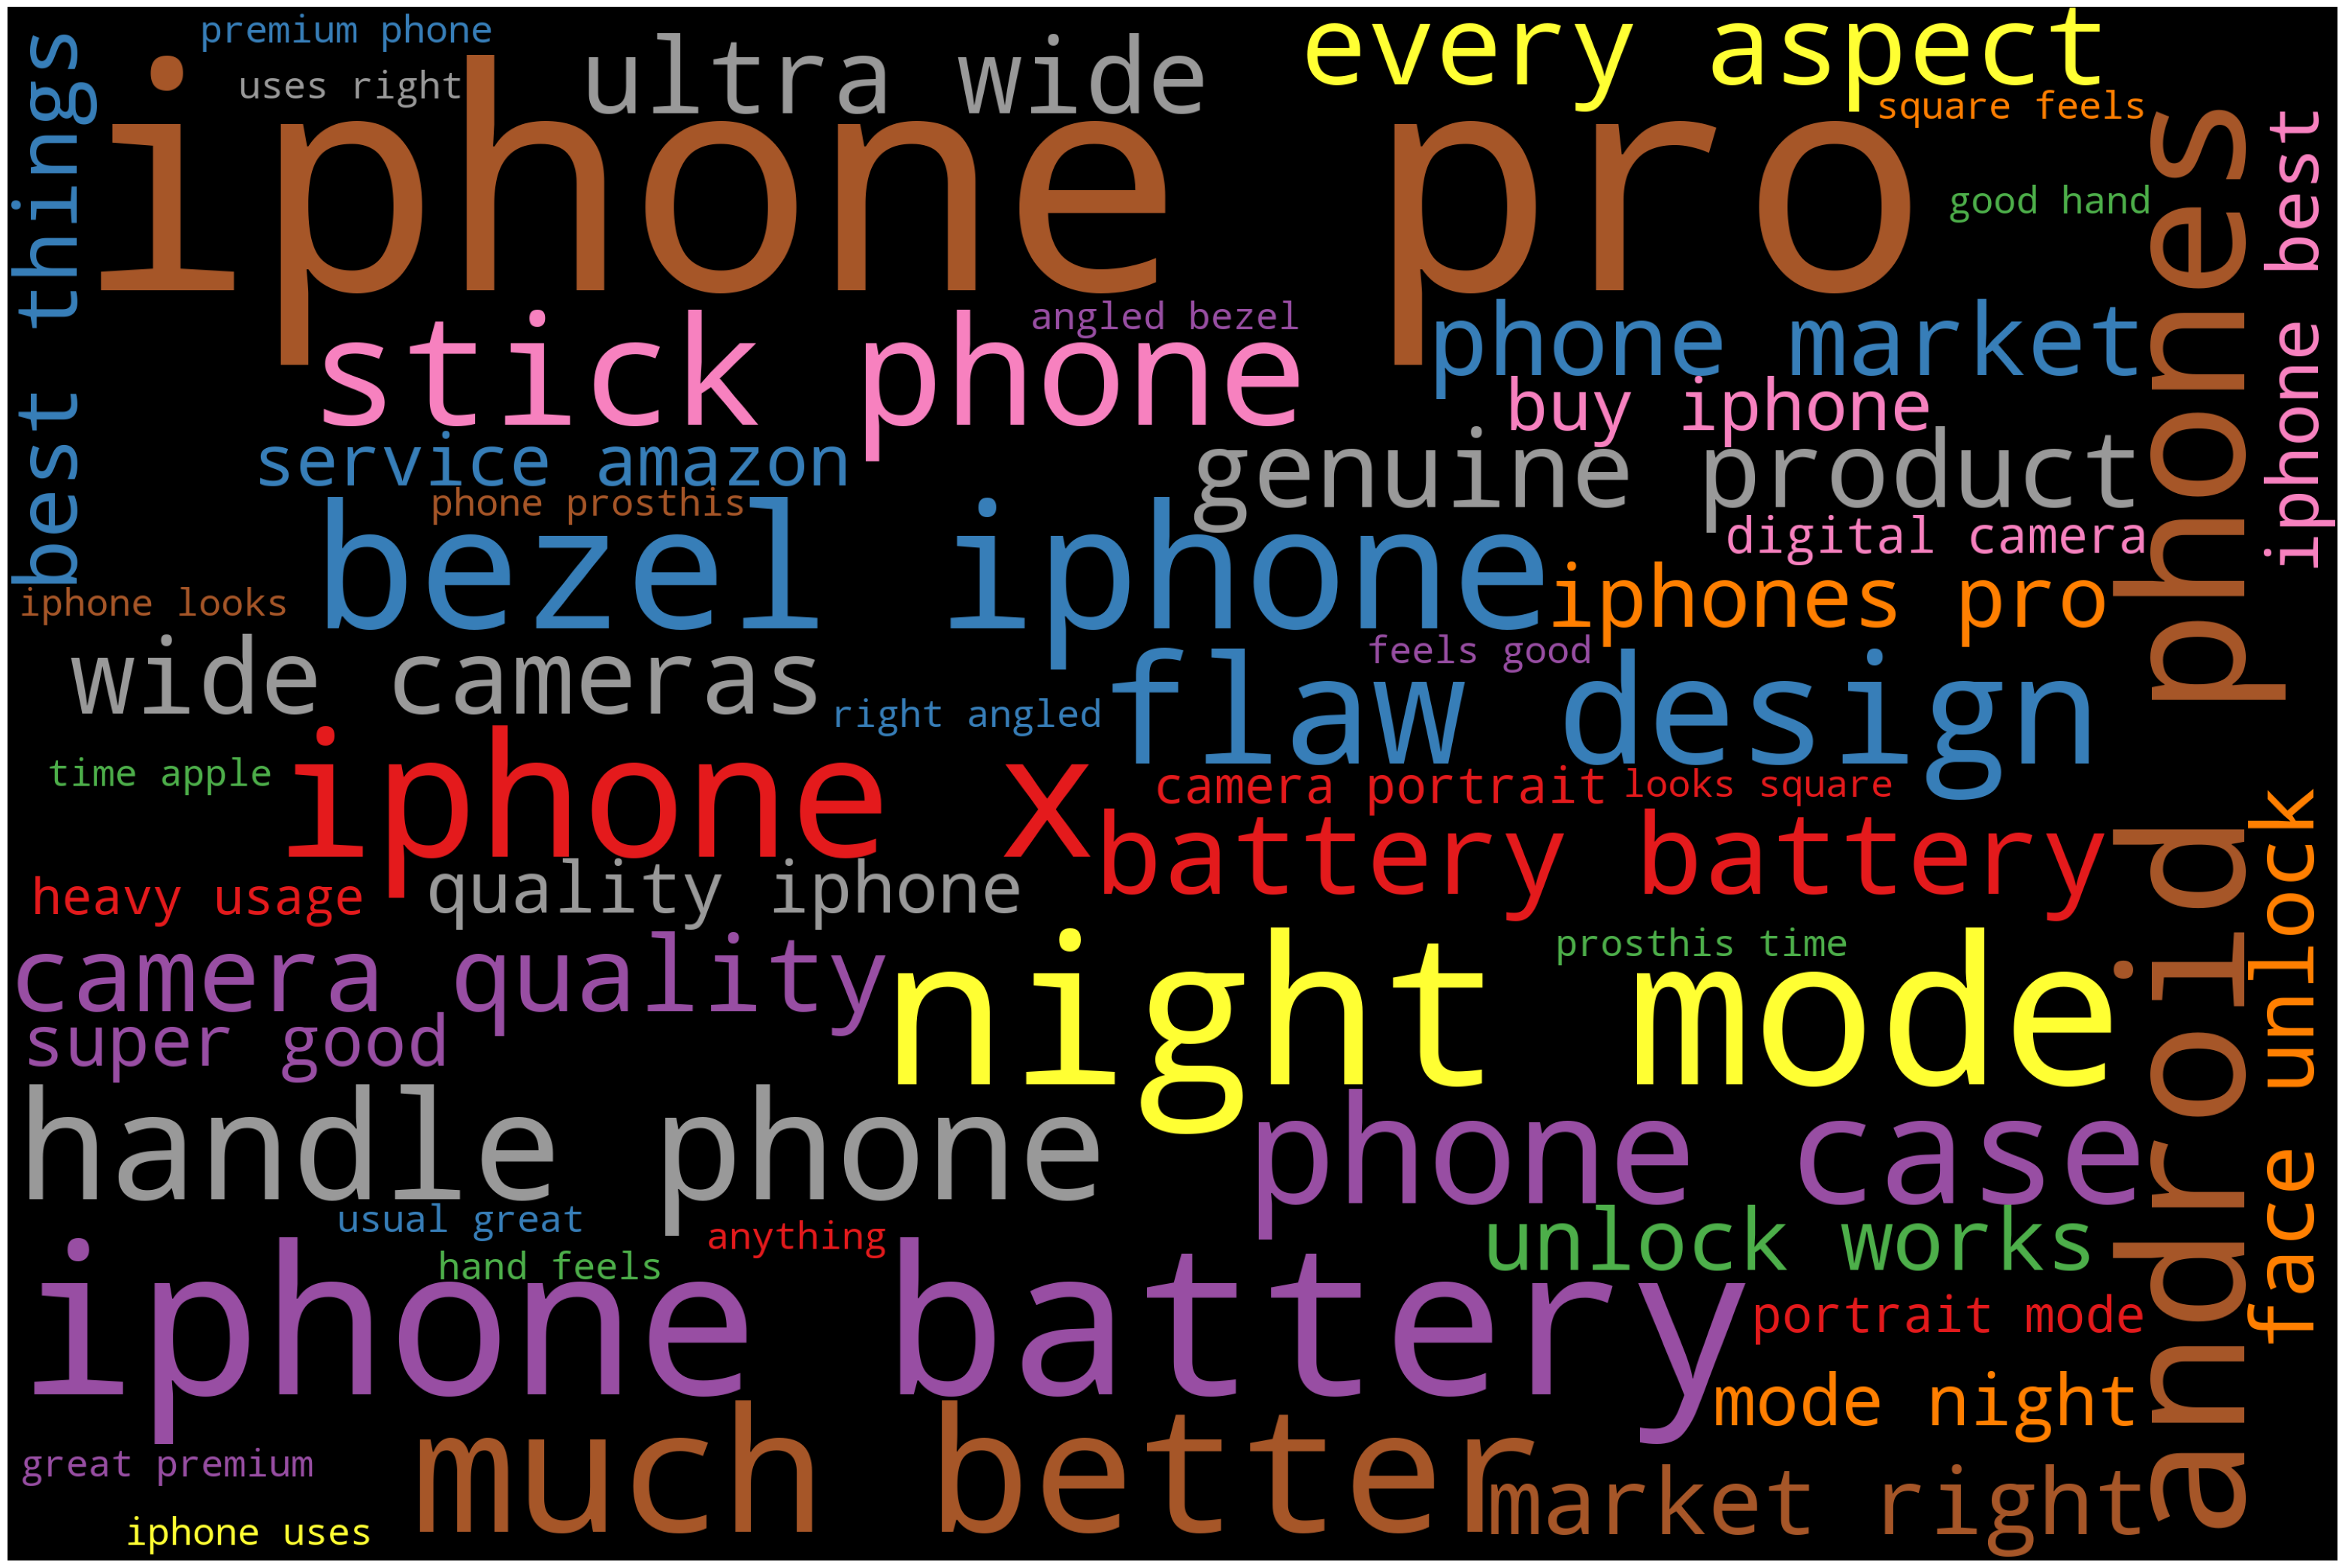

In [27]:
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50, colormap='Set1', stopwords=STOPWORDS).generate(red_rev_string)
plot_cloud(wordcloud)

##### Negative Words

In [28]:
with open("negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")

In [29]:
negwords = negwords[37:]

##### Considering the Positive Words

In [30]:
red_pos = " ".join([w for w in red_rev_words if w in negwords])

##### Generating Cloud for Positive Words

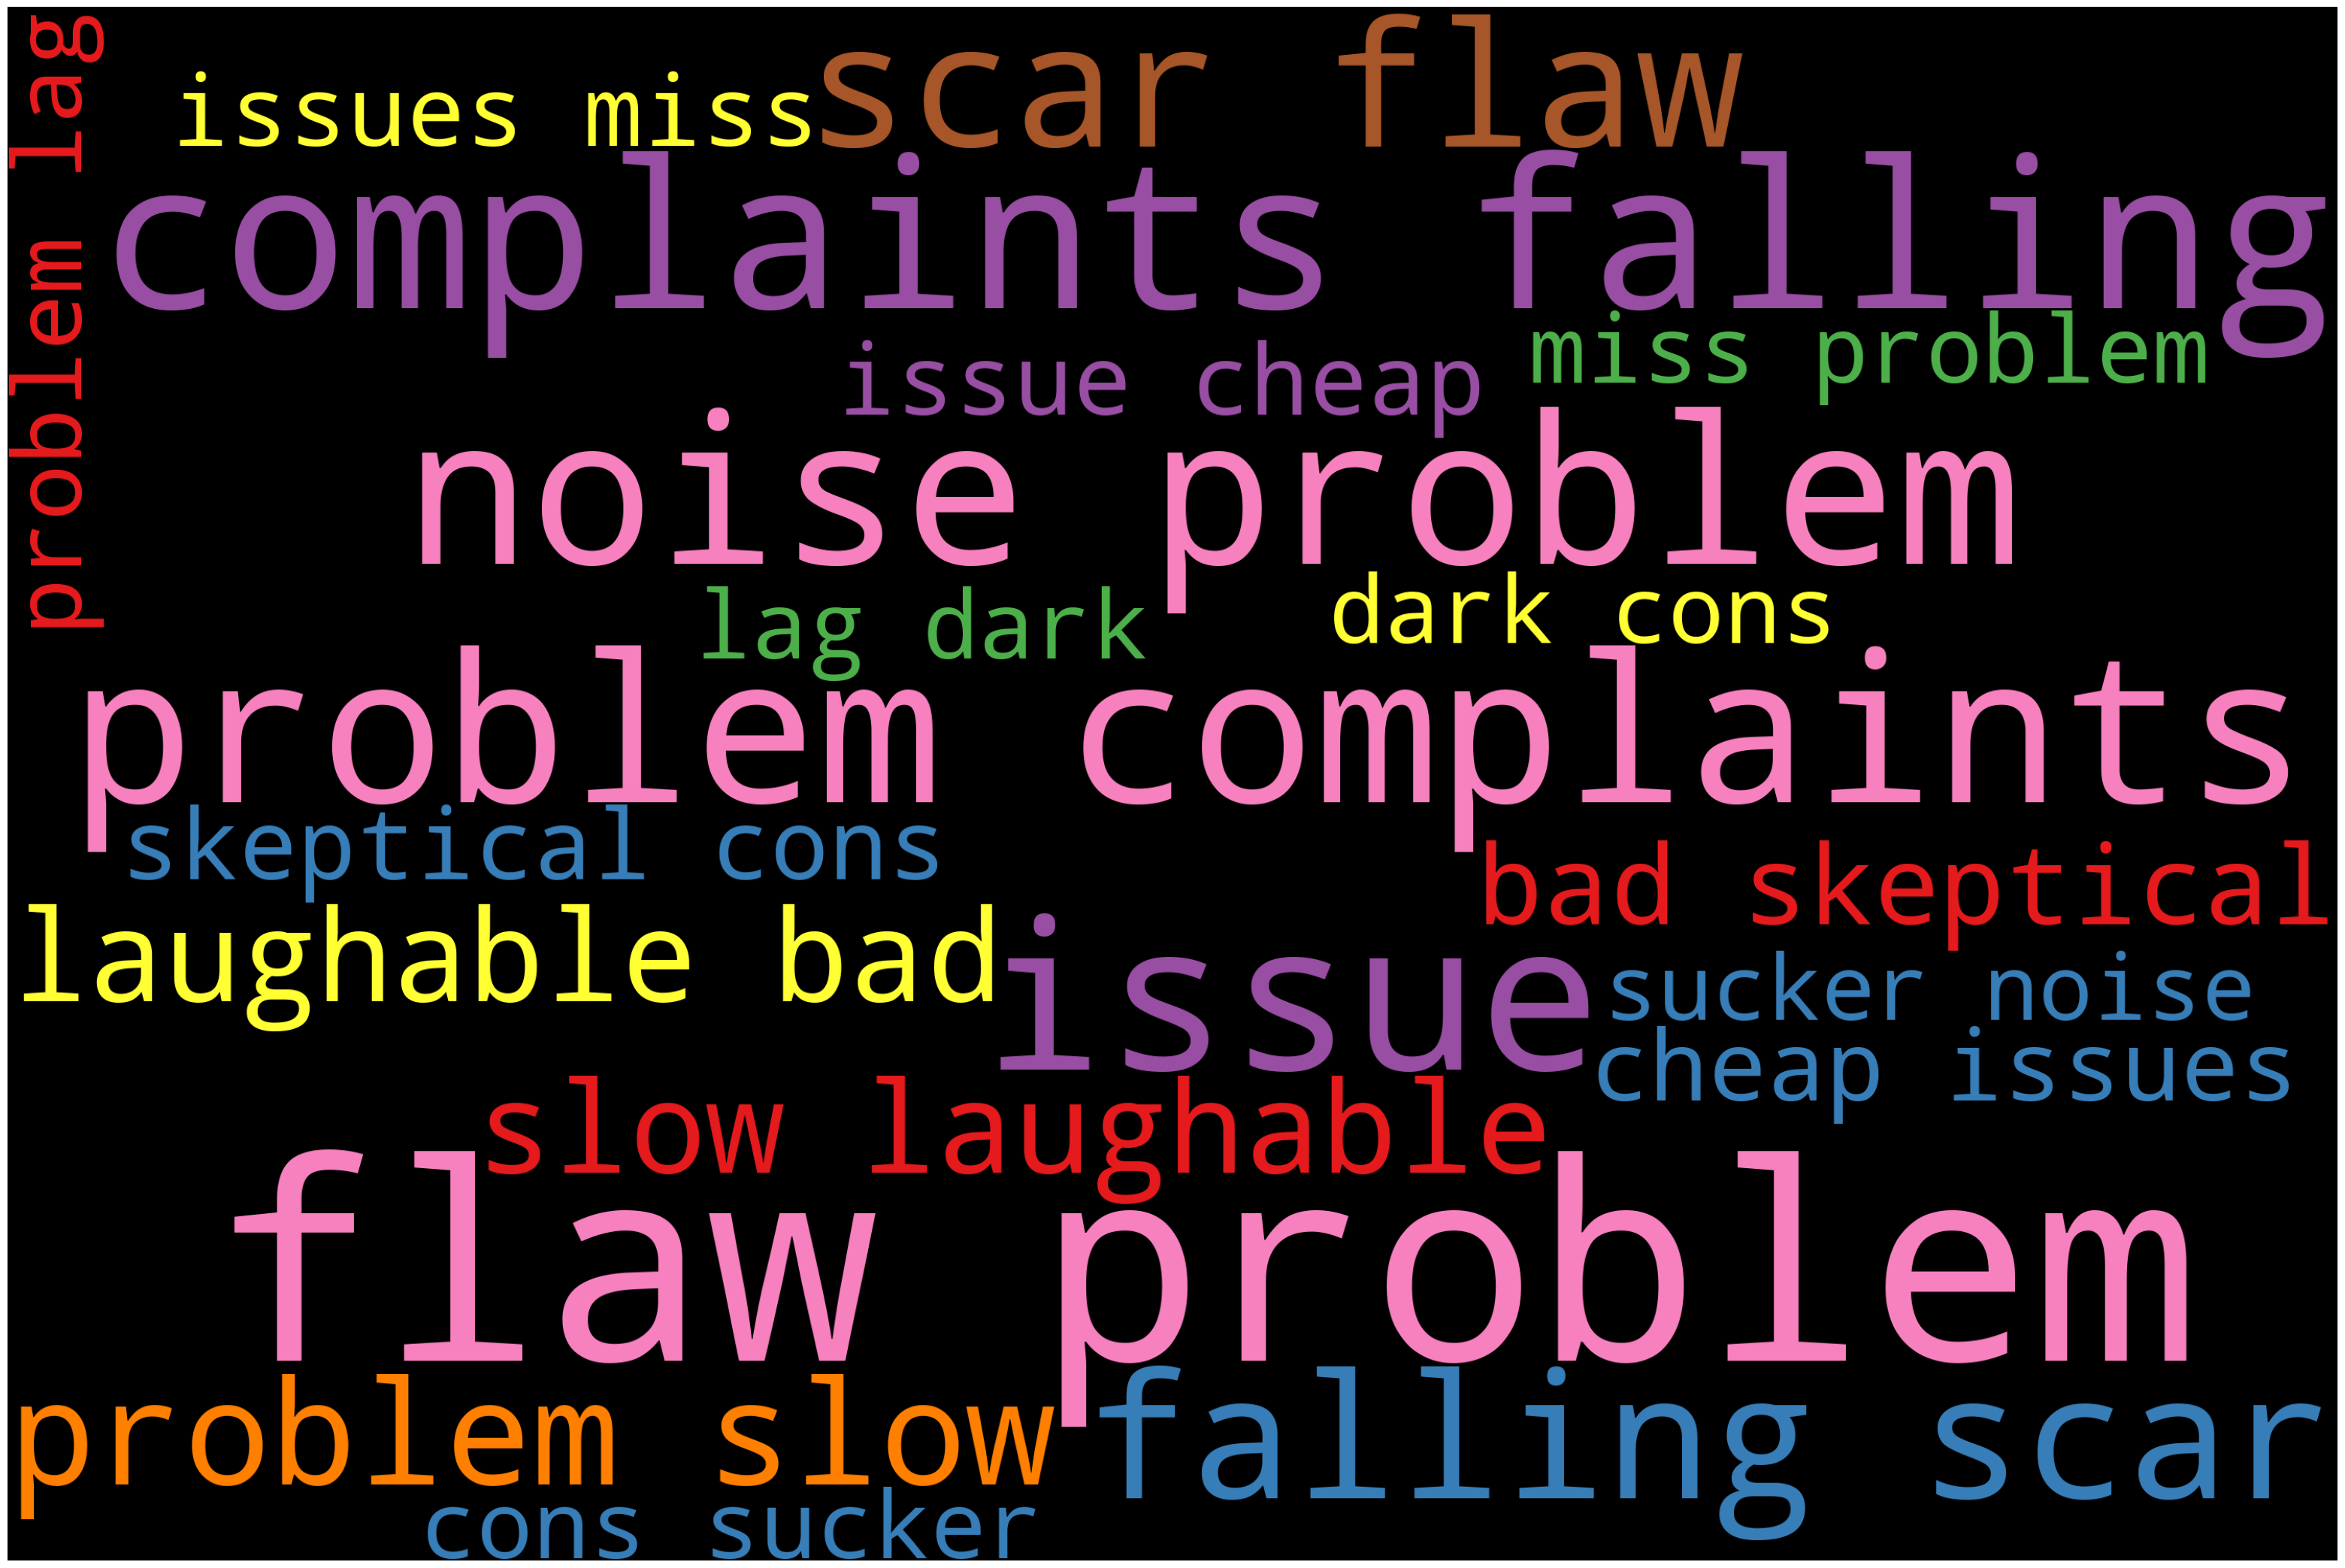

In [31]:
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=50, colormap='Set1', stopwords=STOPWORDS).generate(red_pos)
plot_cloud(wordcloud)

##### Unique Words

In [33]:
red_unique = list(set(" ".join(iphone_reviews).split(" ")))
red_unique

['',
 '1',
 'sub-consciously',
 'size',
 'be',
 'premium',
 'phone,',
 'watching',
 'proud',
 'higher',
 'metal',
 'single',
 'average',
 'tighten',
 'drop',
 'low-light',
 'flaw',
 'money',
 'aspects.It',
 'this',
 'gives',
 'wearing',
 'upgrade',
 'subsequent',
 'fine',
 'takes',
 'gen',
 'regular',
 'sending',
 'hands',
 '...',
 'issues',
 'side,',
 'angles.',
 'some',
 'moving',
 'seller',
 'case.',
 'imitations.',
 'responsive',
 'shots.',
 'maintenance',
 'although',
 'no',
 'usual',
 'Graphite',
 'new',
 'cheap',
 'out',
 'have',
 'best,',
 'life,',
 'bezel',
 'it',
 'perfection!',
 'long',
 'which',
 'fingerprint',
 'mode,',
 'two',
 'further.',
 'still',
 'pro,',
 'Portrait',
 'gripping',
 'sucker',
 'Symbian',
 'Quality',
 'previous',
 'awesome!',
 'X',
 'now.',
 'right',
 'battery,',
 'possible',
 'audio.When',
 'Especially',
 'slippery.',
 'We',
 'say',
 'hand.',
 'genuine',
 'i',
 'superb',
 'Look',
 'photographer',
 'one',
 'latest',
 'refresh',
 'fan',
 'any',
 'one,',
 

### Emotion Mining - Sentiment Analysis

In [62]:
from nltk import tokenize

In [63]:
sentences = tokenize.sent_tokenize(' '.join(iphone_reviews))
sentences

['\nAs usual great & premium phone of 2020 .ProsThis time the Apple iPhone 12 uses the right-angled bezel of the iPhone 4S, which looks square, and it feels good in the hand.',
 'It feels better than the sleek bezel of the iPhone X, especially the 7.4mm thickness with right angles.',
 'The border is particularly stylish.The camera is awesome!',
 'The night view mode turns on automatically, and the imaging effect is really good!',
 'Video stabilization is also good!!!!!!!',
 '!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes wi

In [64]:
sent_df = pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
1496,If you are a photographer or loves taking pict...
1497,👍\n \nIf you're a sucker for SLR/Mirrorless Le...
1498,Look no further.
1499,"I've used all Samsungs, All OnePluses, all iPh..."


##### Using Afinn

In [34]:
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [35]:
from nltk import tokenize

In [36]:
red_unique = tokenize.sent_tokenize(" ".join(iphone_reviews))
red_unique[5:15]

['!The filter mode is quite good.',
 'Many Android phones are still many miles away from these tones even though there are good imitations.',
 'Apple was able to improve its tones.Image quality is perfect and there is little or no noise even in a low-light environment .',
 '** Signal, nothing to say!',
 'It is much better in iPhone 12 Pro & Wifi also .ConsThere is a problem with the hand-handling of this phone.',
 'Oh yes, the iPhone 12 is light to handle, however, it is not easy to handle.',
 'The iPhone 12 comes with metal edges and there have been multiple complaints with respect to these edges.',
 'If you handle this phone for a long time, as your hand becomes a bit moist, the metal becomes slippery.',
 'To prevent your phone from falling to the ground, you will sub-consciously tighten your grip on the phone.',
 'Several reports have shown that tightening your grip on the iPhone 12 leaves you with a scar on your palm.']

In [37]:
sent_df = pd.DataFrame(red_unique, columns=['word'])
sent_df

,word
0,\nAs usual great & premium phone of 2020 .Pros...
1,It feels better than the sleek bezel of the iP...
2,The border is particularly stylish.The camera ...
3,"The night view mode turns on automatically, an..."
4,Video stabilization is also good!!!!!!!
...,...
1496,If you are a photographer or loves taking pict...
1497,👍\n \nIf you're a sucker for SLR/Mirrorless Le...
1498,Look no further.
1499,"I've used all Samsungs, All OnePluses, all iPh..."


In [38]:
affin_scores = afinn.set_index('word')['value'].to_dict()

In [39]:
import spacy
from spacy.lang.en import English

##### Calculating the Score for Original Sentences

In [41]:
nlp = spacy.load('en_core_web_sm')

In [42]:
sentiment_lexicon = affin_scores

In [46]:
def calculate_sentiment(text:str=None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [47]:
calculate_sentiment(text = 'amazing')

4

##### Calculating Sentiment Value for each Sentence

In [61]:
sent_df['sentiment_value'] = sent_df['word'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       6
1       0
2       4
3       3
4       3
       ..
1496    3
1497    5
1498   -1
1499   -1
1500    0
Name: sentiment_value, Length: 1501, dtype: int64

##### Checking Word Count in Sentences

In [49]:
sent_df['word_count'] = sent_df['word'].str.split().apply(len)
sent_df['word_count'].head(10)

0    32
1    18
2     8
3    14
4     5
5     6
6    17
7    23
8     5
9    21
Name: word_count, dtype: int64

In [50]:
sent_df.sort_values(by='sentiment_value').tail(10)

,word,sentiment_value,word_count
1016,Stunning look.Awesome experience using dark mo...,14,14
779,Stunning look.Awesome experience using dark mo...,14,14
1095,Stunning look.Awesome experience using dark mo...,14,14
226,Stunning look.Awesome experience using dark mo...,14,14
1253,Stunning look.Awesome experience using dark mo...,14,14
1174,Stunning look.Awesome experience using dark mo...,14,14
1332,Stunning look.Awesome experience using dark mo...,14,14
68,Stunning look.Awesome experience using dark mo...,14,14
147,Stunning look.Awesome experience using dark mo...,14,14
700,Stunning look.Awesome experience using dark mo...,14,14


In [51]:
sent_df['sentiment_value'].describe()

count    1501.000000
mean        2.177215
std         3.225819
min        -3.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        14.000000
Name: sentiment_value, dtype: float64

##### All Sentiment Value

In [58]:
sent_df['index']=range(0,len(sent_df))
sent_df

,word,sentiment_value,word_count,index
0,\nAs usual great & premium phone of 2020 .Pros...,6,32,0
1,It feels better than the sleek bezel of the iP...,0,18,1
2,The border is particularly stylish.The camera ...,4,8,2
3,"The night view mode turns on automatically, an...",3,14,3
4,Video stabilization is also good!!!!!!!,3,5,4
...,...,...,...,...
1496,If you are a photographer or loves taking pict...,3,49,1496
1497,👍\n \nIf you're a sucker for SLR/Mirrorless Le...,5,39,1497
1498,Look no further.,-1,3,1498
1499,"I've used all Samsungs, All OnePluses, all iPh...",-1,14,1499


##### Positive Sentiment Value

In [59]:
sent_df[sent_df['sentiment_value']>0]

,word,sentiment_value,word_count,index
0,\nAs usual great & premium phone of 2020 .Pros...,6,32,0
2,The border is particularly stylish.The camera ...,4,8,2
3,"The night view mode turns on automatically, an...",3,14,3
4,Video stabilization is also good!!!!!!!,3,5,4
5,!The filter mode is quite good.,3,6,5
...,...,...,...,...
1491,makes life so easy and seamless.,1,6,1491
1492,highly recommend to buy iPhone through Amazon.,2,7,1492
1494,"The portrait mode, the night mode, the regular...",4,16,1494
1496,If you are a photographer or loves taking pict...,3,49,1496


##### Neutral & Negative Sentiment Value

In [60]:
sent_df[sent_df['sentiment_value']<=0]

,word,sentiment_value,word_count,index
1,It feels better than the sleek bezel of the iP...,0,18,1
8,"** Signal, nothing to say!",0,5,8
9,It is much better in iPhone 12 Pro & Wifi also...,-2,21,9
11,The iPhone 12 comes with metal edges and there...,0,18,11
12,"If you handle this phone for a long time, as y...",0,20,12
...,...,...,...,...
1493,Just made an upgrade from iPhone X to iPhone 1...,0,42,1493
1495,This is truly a camera king smartphone availab...,0,13,1495
1498,Look no further.,-1,3,1498
1499,"I've used all Samsungs, All OnePluses, all iPh...",-1,14,1499


##### Visualising Sentiment Value

<Axes: xlabel='sentiment_value', ylabel='Density'>

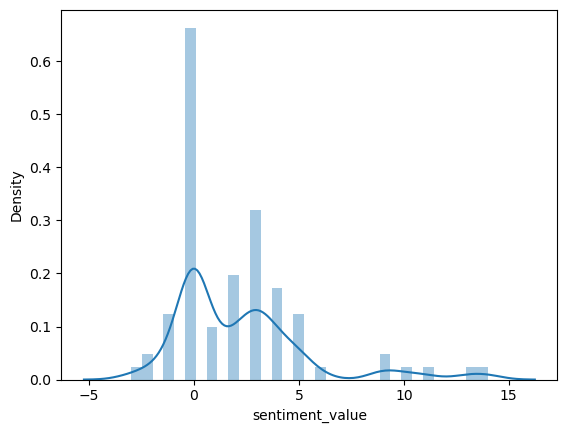

In [55]:
snb.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

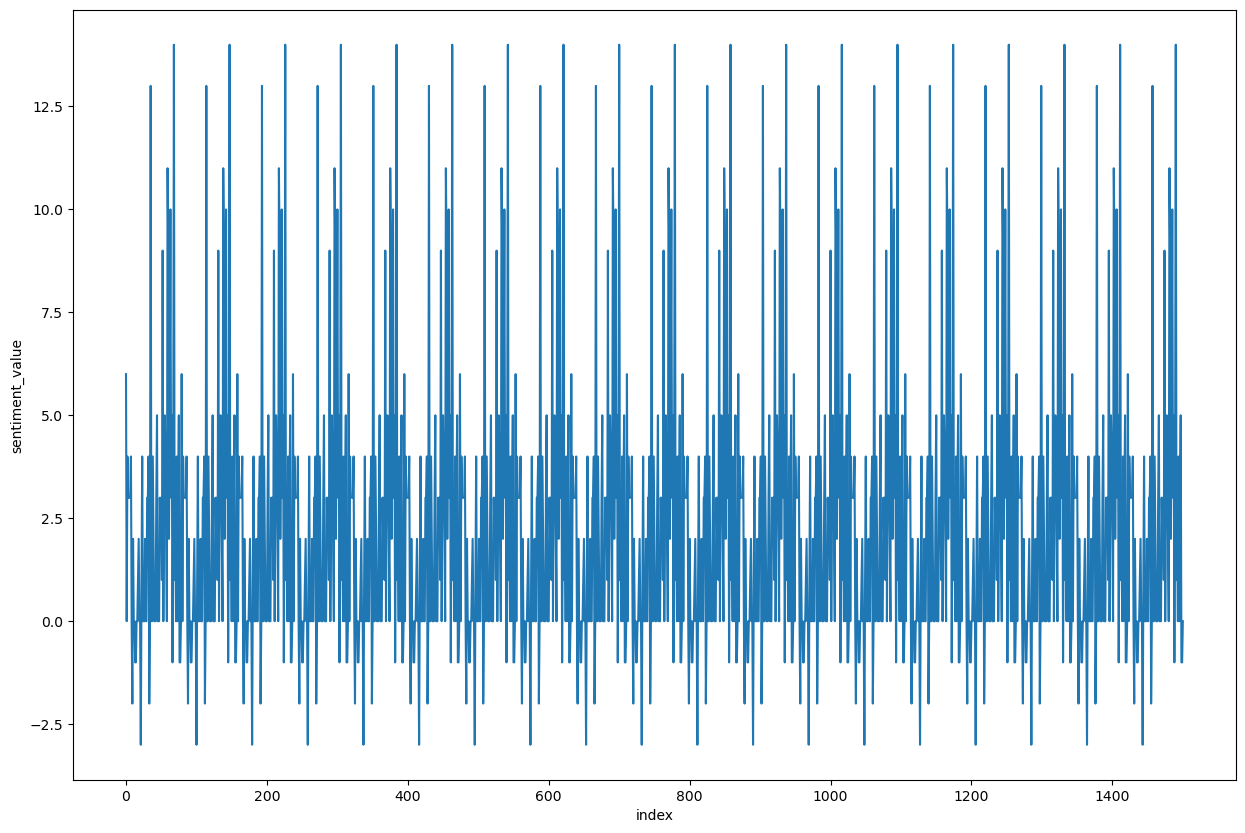

In [56]:
plt.figure(figsize=(15, 10))
snb.lineplot(y='sentiment_value',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment Value v/s Sentence Word Count'}, xlabel='word_count', ylabel='sentiment_value'>

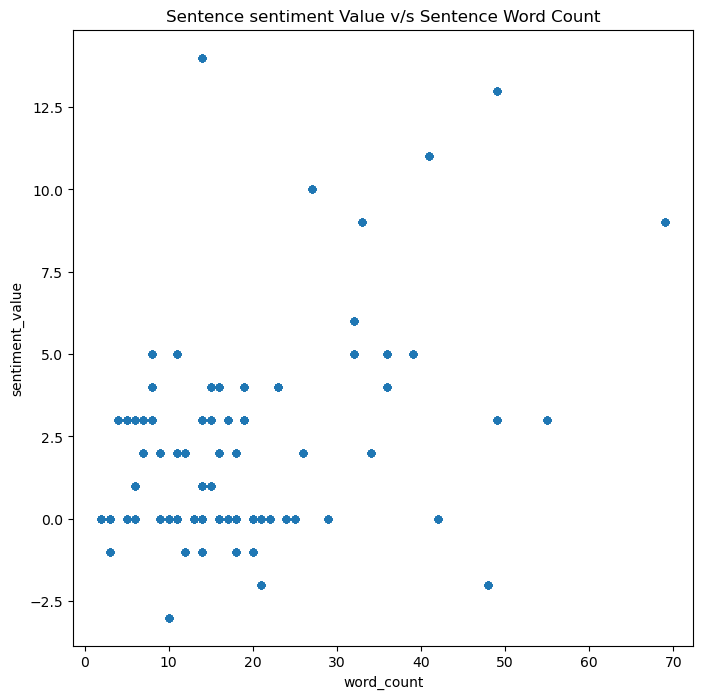

In [57]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment Value v/s Sentence Word Count')